In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

import matplotlib.pyplot as plt
%matplotlib inline
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

In [2]:
with open('crime_data.csv') as f:
    print(f)

<_io.TextIOWrapper name='crime_data.csv' mode='r' encoding='cp1252'>


In [3]:
data = pd.read_csv('crime_data.csv')
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


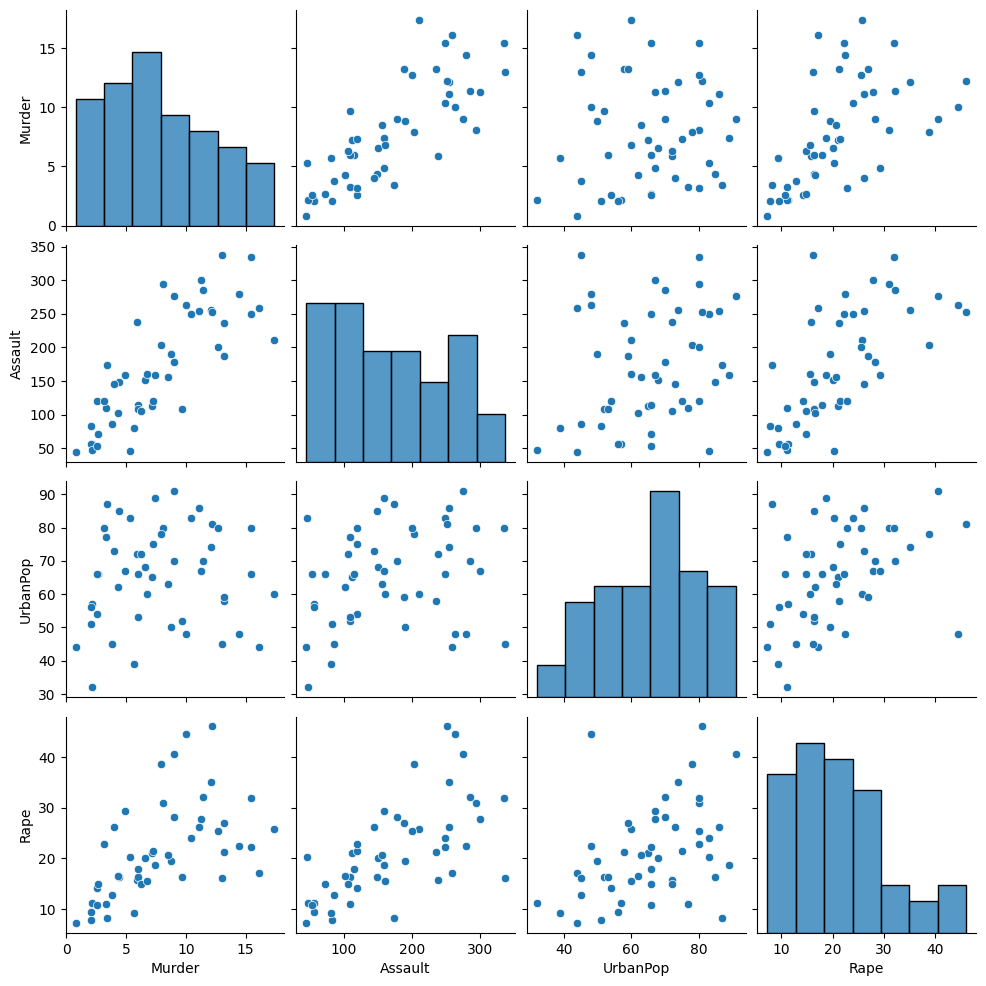

In [7]:
sns.pairplot(data)

In [8]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [9]:
data_norm = norm_func(data.iloc[:,1:])

In [10]:
data_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


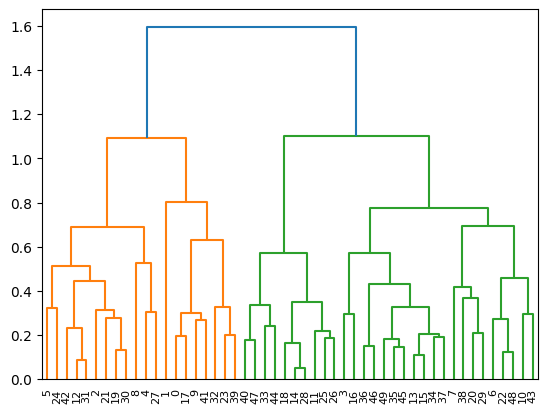

In [11]:
dendrogram = sch.dendrogram(sch.linkage(data_norm, method='complete'))

In [12]:
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')

In [13]:
hc.fit(data_norm)

C:\Users\shlok\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3)

In [14]:
# save clusters for chart
y_hc = hc.fit_predict(data_norm)
# Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

C:\Users\shlok\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [15]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [16]:
Clusters

,Clusters
0,0
1,0
2,0
3,1
4,0
5,0
6,1
7,1
8,0
9,0


In [17]:
Clusters.value_counts()

Clusters
0           20
1           20
2           10
dtype: int64

In [18]:
y_hc

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [19]:
data['h_clusterdid'] = y_hc

In [20]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterdid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0


In [21]:
data = data.sort_values('h_clusterdid')
data.iloc[:,[0,-1]]

,Unnamed: 0,h_clusterdid
0,Alabama,0
42,Texas,0
41,Tennessee,0
39,South Carolina,0
32,North Carolina,0
31,New York,0
30,New Mexico,0
27,Nevada,0
23,Mississippi,0
21,Michigan,0


In [22]:
data_norm_1 = norm_func(data.iloc[:,1:])
# create clusters
hc_1 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

hc_1.fit(data_norm_1)

y_hc_1 = hc.fit_predict(data_norm_1)

y_hc_1

data['h_clusterid'] = y_hc_1

data=data.sort_values("h_clusterid")
new=data.iloc[:,[0,-1]]

C:\Users\shlok\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\shlok\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [23]:
new

,Unnamed: 0,h_clusterid
0,Alabama,0
1,Alaska,0
9,Georgia,0
2,Arizona,0
12,Illinois,0
8,Florida,0
5,Colorado,0
24,Missouri,0
17,Louisiana,0
19,Maryland,0
